In [1]:
####   campo "altura normalizada" com problema

In [2]:
#contar os itens de uma lista
#from collections import Counter

#visualizar graficos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import numpy as np
#bibliotecas pandas de leitura de arquivos
import pandas as pd
#caracter 
import re


#from IPython.display import Image
from pathlib import Path

#from scipy import stats

In [3]:
# Definição se disco C: (laptop) ou D: (desktop) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIR_DATASET = DIR_PREFIXO / "PA_clean" / "dataset"
DIR_PADRAO_DOENCA = DIR_PREFIXO / "PA_clean" / "padrao_doenca"

In [4]:
#leitura do dataset completo com dados cadastrais, medidas e estatísticas
dataset = pd.read_csv(DIR_PADRAO_DOENCA / "pacientes_padrao_doenca"/ "classificados_por_padroes_de_doenca_estatistica.csv",sep=';')

#dataset_apos_tratamento = dataset

#dataset = dataset.drop ("Unnamed: 0", axis=1)
#for i in dataset.columns:
#    print(repr(i))
#

In [5]:
dataset

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,sist 9:30,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,1923-10-05,M,94.0,85.0,160,2018-09-10 12:25:23,105.0,108.0,116.0,...,61.0,9545.5,4902.0,3748.0,841.5,16.58,10.99,15,39,0.966
1,5,1948-10-07,M,70.0,80.0,165,2018-12-26 07:39:41,103.0,114.0,82.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.38,6.89,9,23,0.969
2,6,1999-03-23,M,19.0,100.0,197,2018-12-26 08:06:19,147.0,148.0,156.0,...,80.0,10674.0,6154.0,3721.0,751.5,12.48,13.02,19,20,1.056
3,7,1978-01-26,F,40.0,65.0,"1,64",2018-12-26 08:19:06,140.0,139.0,142.0,...,80.5,10679.5,6420.5,3642.0,602.5,16.14,10.58,23,11,1.107
4,8,1990-03-07,M,28.0,120.0,172,2018-12-26 08:26:59,113.0,110.0,101.0,...,77.0,9141.5,6118.0,2405.0,566.0,11.88,12.65,14,15,1.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21786,1972-11-25,M,47.0,75.0,165,2020-09-10 16:03:08,163.0,198.0,172.0,...,118.0,12224.5,9265.0,2439.0,474.5,17.26,13.89,64,75,1.134
19557,21787,1970-10-19,M,49.0,90.0,183,2020-09-10 16:21:02,114.0,120.0,164.0,...,83.0,10970.0,6819.0,3319.0,738.0,16.85,13.18,32,27,1.046
19558,21788,1985-03-15,F,35.0,93.0,167,2020-09-10 16:44:53,107.0,110.0,103.0,...,62.5,9245.0,4935.5,3556.0,713.5,13.56,8.00,15,28,1.029
19559,21792,1952-04-21,F,68.0,64.0,160,2020-09-10 17:25:50,94.0,107.0,112.0,...,69.5,8989.5,5660.0,2815.5,460.0,13.69,10.59,19,15,1.252


In [6]:
dataset.loc[:,'Hipotensao':]

,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,True,False,False,False,False,False,True,False,False,False,...,61.0,9545.5,4902.0,3748.0,841.5,16.58,10.99,15,39,0.966
1,True,False,False,False,False,False,True,False,False,False,...,62.0,8586.5,5034.5,2915.0,606.0,7.38,6.89,9,23,0.969
2,True,False,False,False,True,False,False,False,False,True,...,80.0,10674.0,6154.0,3721.0,751.5,12.48,13.02,19,20,1.056
3,True,False,False,True,False,False,False,False,False,True,...,80.5,10679.5,6420.5,3642.0,602.5,16.14,10.58,23,11,1.107
4,True,False,False,True,False,False,False,False,False,False,...,77.0,9141.5,6118.0,2405.0,566.0,11.88,12.65,14,15,1.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,True,False,False,True,False,False,False,True,False,True,...,118.0,12224.5,9265.0,2439.0,474.5,17.26,13.89,64,75,1.134
19557,True,False,False,False,True,False,False,False,False,True,...,83.0,10970.0,6819.0,3319.0,738.0,16.85,13.18,32,27,1.046
19558,True,False,False,False,True,False,False,False,False,True,...,62.5,9245.0,4935.5,3556.0,713.5,13.56,8.00,15,28,1.029
19559,True,False,False,False,False,True,False,False,False,False,...,69.5,8989.5,5660.0,2815.5,460.0,13.69,10.59,19,15,1.252


In [7]:
#converter peso em float

def Tratar_Peso(peso):    
    
    try:
        if peso[-1] == ',' or peso[-1] == '.':
            peso =  peso[:-1]
    except:
        pass
    
    
    try:
        peso = float(peso)
    except:
        peso = float(peso.replace(',','.'))
    return peso

#converter altura
def Tratar_Altura(altura):       
       
    
    if re.match('\d,,\d', altura):
        altura = altura.replace(',,','')
    
    try:
        if altura[-1] == ',' or altura[-1] == '.' or  altura[-1] == ']':
            altura =  altura[:-1]
    except:
        pass
    
    try:
        altura = float(altura)
    except:
        altura = float(altura.replace(',','.'))     
    
    # convt 150.00 para 1.50
    if altura >= 3:
        altura = altura/100 
    
    
    return altura

#calcular o IMC
def IMC(peso,altura):  
        
    imc = float(peso) / (float(altura) ** 2)
    
    return round (imc, 1)


#Trocar  True para 1 e False para 0
def verdadeiro_falso(valor):
    if valor == True:
        return 1
    else:
        return 0

def normaliza_float(n):
    if isinstance(n, (float, int)):
        return n
    if isinstance(n, str):
        if "," in n:
            n = n.replace(",", ".")
        if not n.replace(".", "").isdigit():
            n = "".join(digito for digito in n if digito in "0123456789.")
        n = n.replace("..", ".")
        if not n or n.count(".") > 1:
            n = float("nan")
         # convt 150.00 para 1.50
        n = float(n)
        if n >= 3:
            while 1:
                if (n//10 == 0.0 or n//10 == 0):
                    break
                else:
                    n = n/10 
    return float(n)


In [8]:
# Identificando dados espúrios no campo altura e descartando
dataset = dataset[dataset['altura'] != '?']

#filtrar nulos em peso e altura
dataset = dataset[~dataset['peso'].isnull() & ~dataset['altura'].isnull()]


In [9]:
#  Normalizando Peso e Altura
dataset['peso_normalizado'] = dataset['peso'].apply(Tratar_Peso)
dataset['altura_normalizada'] = dataset['altura'].apply(normaliza_float)

In [10]:
#max(dataset_apos_tratamento['peso_normalizado'])
#max(dataset_apos_tratamento['altura_normalizada'].values)


In [11]:
#calculo do IMC
# Inclui coluna de IMC no dataset de entrada
dataset['IMC'] = dataset.apply(lambda row : IMC(row['peso_normalizado'], row['altura_normalizada']), axis = 1)

In [12]:
dataset = dataset[(dataset['idade'] != 0) & (dataset['peso_normalizado'] <= 200)]
dataset

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,sist 9:30,...,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping,peso_normalizado,altura_normalizada,IMC
0,4,1923-10-05,M,94.0,85.0,160,2018-09-10 12:25:23,105.0,108.0,116.0,...,3748.0,841.5,16.58,10.99,15,39,0.966,85.0,1.60,33.2
1,5,1948-10-07,M,70.0,80.0,165,2018-12-26 07:39:41,103.0,114.0,82.0,...,2915.0,606.0,7.38,6.89,9,23,0.969,80.0,1.65,29.4
2,6,1999-03-23,M,19.0,100.0,197,2018-12-26 08:06:19,147.0,148.0,156.0,...,3721.0,751.5,12.48,13.02,19,20,1.056,100.0,1.97,25.8
3,7,1978-01-26,F,40.0,65.0,"1,64",2018-12-26 08:19:06,140.0,139.0,142.0,...,3642.0,602.5,16.14,10.58,23,11,1.107,65.0,1.64,24.2
4,8,1990-03-07,M,28.0,120.0,172,2018-12-26 08:26:59,113.0,110.0,101.0,...,2405.0,566.0,11.88,12.65,14,15,1.137,120.0,1.72,40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21786,1972-11-25,M,47.0,75.0,165,2020-09-10 16:03:08,163.0,198.0,172.0,...,2439.0,474.5,17.26,13.89,64,75,1.134,75.0,1.65,27.5
19557,21787,1970-10-19,M,49.0,90.0,183,2020-09-10 16:21:02,114.0,120.0,164.0,...,3319.0,738.0,16.85,13.18,32,27,1.046,90.0,1.83,26.9
19558,21788,1985-03-15,F,35.0,93.0,167,2020-09-10 16:44:53,107.0,110.0,103.0,...,3556.0,713.5,13.56,8.00,15,28,1.029,93.0,1.67,33.3
19559,21792,1952-04-21,F,68.0,64.0,160,2020-09-10 17:25:50,94.0,107.0,112.0,...,2815.5,460.0,13.69,10.59,19,15,1.252,64.0,1.60,25.0


In [13]:

pesos = dataset[(dataset['idade'] != 0) & (dataset['peso_normalizado'] <= 200)]['peso_normalizado'].unique()
pesos.sort()
pesos

array([  4.,   6.,  22.,  24.,  30.,  31.,  33.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 132., 133., 134., 135., 136., 137., 138.,
       139., 140., 142., 143., 145., 146., 147., 148., 149., 150., 151.,
       152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162.,
       163., 164., 165., 166., 167., 168., 169., 170., 171., 173., 174.,
       175., 176., 177., 178., 180., 181., 182., 18

In [14]:
# transform Gender M and F to binary 
#  gênero = F => 0
# gênero = M => 1
#

limpa_coluna_genero = {"genero": {"M": True, "F": False}}
controle = 1
genero0 = dataset['genero']
for i in range(len(genero0)):
    if genero0.iloc[i] != 'M' and genero0.iloc[i] != 'F':
        if controle == 1:
            genero0.iloc[i] = 0
            controle = 0
        else:
            genero0.iloc[i] = 1
            controle = 1

dataset['genero'] = genero0

dataset = dataset.replace(limpa_coluna_genero)

dataset["genero"] = dataset["genero"].astype(int)

limpa_coluna_genero = {"genero": {"M": True, "F": False}}
#
#


<ipython-input-14-1419f7f0d798>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero0.iloc[i] = 1
<ipython-input-14-1419f7f0d798>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero0.iloc[i] = 0


In [15]:
dataset['idade'] = dataset['idade'].fillna(-1)
dataset = dataset[dataset['idade'] != -1]

In [16]:
#  Política de descarte: pacientes menores que 18 anos ou pacientes com 12 IMC < 95
#
dataset = dataset[(dataset['IMC'] <= 95)
            & (dataset['IMC'] >= 15)
            & (dataset['idade'] >= 18)]

In [17]:
print (dataset)

       numero_identificacao data_nascimento  genero  idade   peso altura  \
0                         4      1923-10-05       1   94.0   85.0    160   
1                         5      1948-10-07       1   70.0   80.0    165   
2                         6      1999-03-23       1   19.0  100.0    197   
3                         7      1978-01-26       0   40.0   65.0   1,64   
4                         8      1990-03-07       1   28.0  120.0    172   
...                     ...             ...     ...    ...    ...    ...   
19556                 21786      1972-11-25       1   47.0   75.0    165   
19557                 21787      1970-10-19       1   49.0   90.0    183   
19558                 21788      1985-03-15       0   35.0   93.0    167   
19559                 21792      1952-04-21       0   68.0   64.0    160   
19560                 21793      1971-01-14       1   49.0   99.0    179   

                data_exame  sist 9:00  sist 9:15  sist 9:30  ...  \
0      2018-09-10 1

In [18]:
for doenca in list(dataset.loc[:,'Hipotensao':'Normotenso'].columns):
    dataset[doenca] = dataset[doenca].apply(verdadeiro_falso)
dataset

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,sist 9:30,...,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping,peso_normalizado,altura_normalizada,IMC
0,4,1923-10-05,1,94.0,85.0,160,2018-09-10 12:25:23,105.0,108.0,116.0,...,3748.0,841.5,16.58,10.99,15,39,0.966,85.0,1.60,33.2
1,5,1948-10-07,1,70.0,80.0,165,2018-12-26 07:39:41,103.0,114.0,82.0,...,2915.0,606.0,7.38,6.89,9,23,0.969,80.0,1.65,29.4
2,6,1999-03-23,1,19.0,100.0,197,2018-12-26 08:06:19,147.0,148.0,156.0,...,3721.0,751.5,12.48,13.02,19,20,1.056,100.0,1.97,25.8
3,7,1978-01-26,0,40.0,65.0,"1,64",2018-12-26 08:19:06,140.0,139.0,142.0,...,3642.0,602.5,16.14,10.58,23,11,1.107,65.0,1.64,24.2
4,8,1990-03-07,1,28.0,120.0,172,2018-12-26 08:26:59,113.0,110.0,101.0,...,2405.0,566.0,11.88,12.65,14,15,1.137,120.0,1.72,40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21786,1972-11-25,1,47.0,75.0,165,2020-09-10 16:03:08,163.0,198.0,172.0,...,2439.0,474.5,17.26,13.89,64,75,1.134,75.0,1.65,27.5
19557,21787,1970-10-19,1,49.0,90.0,183,2020-09-10 16:21:02,114.0,120.0,164.0,...,3319.0,738.0,16.85,13.18,32,27,1.046,90.0,1.83,26.9
19558,21788,1985-03-15,0,35.0,93.0,167,2020-09-10 16:44:53,107.0,110.0,103.0,...,3556.0,713.5,13.56,8.00,15,28,1.029,93.0,1.67,33.3
19559,21792,1952-04-21,0,68.0,64.0,160,2020-09-10 17:25:50,94.0,107.0,112.0,...,2815.5,460.0,13.69,10.59,19,15,1.252,64.0,1.60,25.0


In [19]:
dataset.info

<bound method DataFrame.info of        numero_identificacao data_nascimento  genero  idade   peso altura  \
0                         4      1923-10-05       1   94.0   85.0    160   
1                         5      1948-10-07       1   70.0   80.0    165   
2                         6      1999-03-23       1   19.0  100.0    197   
3                         7      1978-01-26       0   40.0   65.0   1,64   
4                         8      1990-03-07       1   28.0  120.0    172   
...                     ...             ...     ...    ...    ...    ...   
19556                 21786      1972-11-25       1   47.0   75.0    165   
19557                 21787      1970-10-19       1   49.0   90.0    183   
19558                 21788      1985-03-15       0   35.0   93.0    167   
19559                 21792      1952-04-21       0   68.0   64.0    160   
19560                 21793      1971-01-14       1   49.0   99.0    179   

                data_exame  sist 9:00  sist 9:15  sist 

In [20]:
dataset = dataset[dataset['altura_normalizada'] <= 2.5]
dataset = pd.concat([dataset.loc[:,'numero_identificacao':'altura'],
                     dataset['IMC'],
                     dataset.loc[:,'data_exame':'Diferença % Dipping']],
                        axis=1)

print(len(dataset))
# Dataset com IMC e tratamento de Nans com a política de normalização
dataset.to_csv(DIR_DATASET / "dados_tratados" / "pacientes_completos_tratados.csv", 
                        sep=";", encoding="latin1", index=False)
print(DIR_DATASET)
dataset.to_csv(DIR_DATASET /  "dados_tratados" / "pacientes_com_tab.csv", 
                        sep="\t", encoding="latin1", index=False)

19150
D:\PA_clean\dataset


In [21]:
#  Gerar arquivo completo com atributos categorizados
#  quantificar por categorias e total de pacientes
#  quantificar média de PAS e PAD em 24h 
dataset.head()

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,sist 9:00,sist 9:15,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,105.0,108.0,...,61.0,9545.5,4902.0,3748.0,841.5,16.58,10.99,15,39,0.966
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,103.0,114.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.38,6.89,9,23,0.969
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,147.0,148.0,...,80.0,10674.0,6154.0,3721.0,751.5,12.48,13.02,19,20,1.056
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,140.0,139.0,...,80.5,10679.5,6420.5,3642.0,602.5,16.14,10.58,23,11,1.107
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,113.0,110.0,...,77.0,9141.5,6118.0,2405.0,566.0,11.88,12.65,14,15,1.137


## Gera arquivo para t-SNE

In [22]:
# dataset apenas com as medidas para input do t-SNE
dataset_tab_sem_cabecalho = dataset.loc[:,'sist 9:00':'diast 8:45']
dataset_tab_sem_cabecalho.to_csv(DIR_DATASET / "dados_tratados" / "t-SNE" / "pacientes_para_tSNE.tsv", 
                        sep="\t", encoding="latin1", header=False, index=False)

## Gráficos 

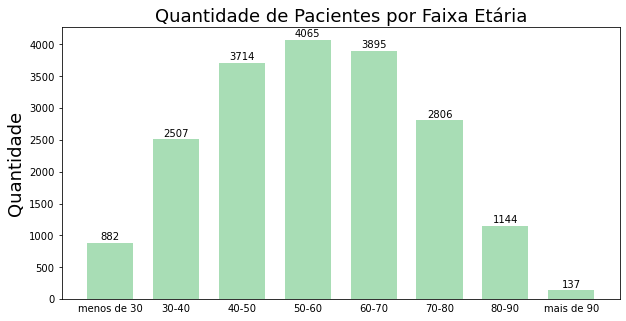

In [23]:
#   Gráfico da quantidade de pacientes por faixa etária a cada 10 anos após políticas de descarte e imputação
#
# "#a8ddb5"

plt.rcParams['figure.figsize'] = [10, 5]


def converte_idade(idade):
    if idade < 30:
        return 25
    if idade > 90:
        return 95
    return idade

idades_categorizadas = dataset["idade"].apply(converte_idade)

y_counts, x_counts, patches = plt.hist(idades_categorizadas, [20,30,40,50,60,70,80,90,100], rwidth=0.7, color="#a8ddb5")

for i, barra in enumerate(patches):
   x = (barra._x0 + barra._x1) / 2
   y = barra._y1 + 50
   plt.text(x, y, int(barra._y1), horizontalalignment="center")
   texto = f"{x_counts[i]}-{x_counts[i+1]}" if i > 0 and i < len(x_counts) - 2 else (
   "menos de 30" if i == 0  else "mais de 90"
   )
   plt.text(x, barra._y0 - 200, texto, horizontalalignment="center")
plt.xticks([]) 
# plt.xticks(range(0,120,10))
plt.title("Quantidade de Pacientes por Faixa Etária", fontsize=18)
plt.ylabel('Quantidade', fontsize=18)
#plt.xlabel('Faixa Etária em Anos')
plt.savefig(DIR_DATASET / "dados_tratados" / "graficos_dados_tratados" / "qtd_pacientes_faixa_etaria.png")
plt.show()